In [20]:
# Import dependency
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pprint import pprint

In [21]:
# Import Mongo keys
from mongo_access  import password

In [22]:
# Create an instance of MongoClient
mongo = MongoClient(password)

In [23]:
# Assign the database to a variable name
db = mongo['books']
collection = db['books']

In [24]:
# review the collections in our new database with a sample of book reviews
data = collection.aggregate([{'$sample': {'size': 10000}}])

In [25]:
# Convert to Pandas DataFrame
df = pd.DataFrame(data)
df.head()

,_id,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,...,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,genre,random
0,66e3628697403ebaddeb517a,0141313447,3,"[227599, 988957]",US,en-GB,"[{'count': '249', 'name': 'to-read'}, {'count'...",,false,3.97,...,2003,https://www.goodreads.com/book/show/499281.Sta...,https://images.gr-assets.com/books/1362038194m...,499281,17,110443,"Starlight Surprise (My Secret Unicorn, #4)","Starlight Surprise (My Secret Unicorn, #4)",children,519
1,66e3626e97403ebaddeb41f9,0006933971,11,"[259265, 234233]",US,en-GB,"[{'count': '83', 'name': 'to-read'}, {'count':...",,false,4.01,...,1989,https://www.goodreads.com/book/show/1175276.Ga...,https://images.gr-assets.com/books/1319798526m...,1175276,158,1162860,Gay Lambert at the Chalet School (The Chalet S...,Gay Lambert at the Chalet School (The Chalet S...,children,432
2,66e3625d97403ebaddeb1fde,0689703589,4,[],US,,"[{'count': '9', 'name': 'to-read'}, {'count': ...",,false,4.25,...,1973,https://www.goodreads.com/book/show/1907080.Sa...,https://images.gr-assets.com/books/1327847558m...,1907080,20,1908912,"Sasha, My Friend","Sasha, My Friend",children,211
3,66e3628597403ebaddeb50ea,0698119851,8,[],US,,"[{'count': '9', 'name': 'to-read'}, {'count': ...",,false,3.00,...,2003,https://www.goodreads.com/book/show/186462.Fle...,https://images.gr-assets.com/books/1309201617m...,186462,21,180238,Fledgling,Fledgling,children,450
4,66e3626497403ebaddeb2d0b,1629914460,2,[],US,eng,"[{'count': '13', 'name': 'to-read'}, {'count':...",,false,3.47,...,2016,https://www.goodreads.com/book/show/25664469-d...,https://images.gr-assets.com/books/1444691351m...,25664469,13,45487248,Disney Graphic Novels #2: X-Mickey #1,Disney Graphic Novels #2: X-Mickey #1,children,824


In [26]:
# Drop columns not needed for analysis
df_clean = df.drop(columns=['_id', 'text_reviews_count', 'series', 'country_code', 'language_code', 'url', 'image_url', 
                 'book_id', 'work_id', 'title_without_series', 'random', 'asin', 'kindle_asin',	'similar_books', 'description',
                 'link', 'publisher', 'isbn', 'edition_information', 'publication_day', 'authors'])
df_clean.head()

,popular_shelves,is_ebook,average_rating,format,num_pages,isbn13,publication_month,publication_year,ratings_count,title,genre
0,"[{'count': '249', 'name': 'to-read'}, {'count'...",false,3.97,Paperback,128,9780141313443,1,2003,17,"Starlight Surprise (My Secret Unicorn, #4)",children
1,"[{'count': '83', 'name': 'to-read'}, {'count':...",false,4.01,Paperback,176,9780006933977,2,1989,158,Gay Lambert at the Chalet School (The Chalet S...,children
2,"[{'count': '9', 'name': 'to-read'}, {'count': ...",false,4.25,Paperback,,9780689703584,2,1973,20,"Sasha, My Friend",children
3,"[{'count': '9', 'name': 'to-read'}, {'count': ...",false,3.00,Paperback,32,9780698119857,3,2003,21,Fledgling,children
4,"[{'count': '13', 'name': 'to-read'}, {'count':...",false,3.47,Paperback,64,9781629914466,3,2016,13,Disney Graphic Novels #2: X-Mickey #1,children


In [27]:
# Reorder columns based on need
df_clean = df_clean[['title', 'genre', 'average_rating', 'num_pages', 'publication_month', 
                     'publication_year', 'format', 'num_pages', 'is_ebook', 'ratings_count', 'popular_shelves', 'isbn13']]
df_clean.head()

,title,genre,average_rating,num_pages,publication_month,publication_year,format,num_pages,is_ebook,ratings_count,popular_shelves,isbn13
0,"Starlight Surprise (My Secret Unicorn, #4)",children,3.97,128,1,2003,Paperback,128,false,17,"[{'count': '249', 'name': 'to-read'}, {'count'...",9780141313443
1,Gay Lambert at the Chalet School (The Chalet S...,children,4.01,176,2,1989,Paperback,176,false,158,"[{'count': '83', 'name': 'to-read'}, {'count':...",9780006933977
2,"Sasha, My Friend",children,4.25,,2,1973,Paperback,,false,20,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780689703584
3,Fledgling,children,3.00,32,3,2003,Paperback,32,false,21,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780698119857
4,Disney Graphic Novels #2: X-Mickey #1,children,3.47,64,3,2016,Paperback,64,false,13,"[{'count': '13', 'name': 'to-read'}, {'count':...",9781629914466


In [28]:
# Remove the duplicate num_pages column
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

In [29]:
df_clean.head()

,title,genre,average_rating,num_pages,publication_month,publication_year,format,is_ebook,ratings_count,popular_shelves,isbn13
0,"Starlight Surprise (My Secret Unicorn, #4)",children,3.97,128,1,2003,Paperback,false,17,"[{'count': '249', 'name': 'to-read'}, {'count'...",9780141313443
1,Gay Lambert at the Chalet School (The Chalet S...,children,4.01,176,2,1989,Paperback,false,158,"[{'count': '83', 'name': 'to-read'}, {'count':...",9780006933977
2,"Sasha, My Friend",children,4.25,,2,1973,Paperback,false,20,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780689703584
3,Fledgling,children,3.00,32,3,2003,Paperback,false,21,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780698119857
4,Disney Graphic Novels #2: X-Mickey #1,children,3.47,64,3,2016,Paperback,false,13,"[{'count': '13', 'name': 'to-read'}, {'count':...",9781629914466


In [30]:
# Convert strings to floats
df_clean['average_rating'] = df['average_rating'].astype('float64') 

In [31]:
df_clean['num_pages'] = df_clean['num_pages'].replace(r'^\s*$', None, regex=True)

# Convert the column to float
df_clean['num_pages'] = pd.to_numeric(df_clean['num_pages'], errors='coerce')


In [32]:
df_clean['publication_month'] = df_clean['publication_month'].replace(r'^\s*$', None, regex=True)

# Convert the column to float
df_clean['publication_month'] = pd.to_numeric(df_clean['publication_month'], errors='coerce')

In [33]:
df_clean['publication_year'] = df_clean['publication_year'].replace(r'^\s*$', None, regex=True)

# Convert the column to float
df_clean['publication_year'] = pd.to_numeric(df_clean['publication_year'], errors='coerce')

In [34]:
df_clean.dtypes

title                 object
genre                 object
average_rating       float64
num_pages            float64
publication_month    float64
publication_year     float64
format                object
is_ebook              object
ratings_count         object
popular_shelves       object
isbn13                object
dtype: object

In [35]:
df_clean.head()

,title,genre,average_rating,num_pages,publication_month,publication_year,format,is_ebook,ratings_count,popular_shelves,isbn13
0,"Starlight Surprise (My Secret Unicorn, #4)",children,3.97,128.0,1.0,2003.0,Paperback,false,17,"[{'count': '249', 'name': 'to-read'}, {'count'...",9780141313443
1,Gay Lambert at the Chalet School (The Chalet S...,children,4.01,176.0,2.0,1989.0,Paperback,false,158,"[{'count': '83', 'name': 'to-read'}, {'count':...",9780006933977
2,"Sasha, My Friend",children,4.25,NaN,2.0,1973.0,Paperback,false,20,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780689703584
3,Fledgling,children,3.00,32.0,3.0,2003.0,Paperback,false,21,"[{'count': '9', 'name': 'to-read'}, {'count': ...",9780698119857
4,Disney Graphic Novels #2: X-Mickey #1,children,3.47,64.0,3.0,2016.0,Paperback,false,13,"[{'count': '13', 'name': 'to-read'}, {'count':...",9781629914466


In [44]:
# Find the most reviewed book
most_reviewed_book = collection.find().sort('ratings_count', -1).limit(1)

# Print the most reviewed book details
for book in most_reviewed_book:
    print(f"The most reviewed book is '{book['title']}' with {book['ratings_count']} reviews.")


The most reviewed book is 'The Fox Went Out on a Chilly Night' with 999 reviews.


In [37]:
# Group by the book title and count the number of reviews
least_reviewed = df_clean.groupby('title')['ratings_count'].count()

# Find the title with the minimum reviews
least_reviewed_book = least_reviewed.idxmin()
least_reviewed_count = least_reviewed.min()

print(f"The least reviewed book is '{least_reviewed_book}' with {least_reviewed_count} reviews.")


The least reviewed book is '"A" is for Appalachia: The Alphabet Book of Appalachian Heritage' with 1 reviews.


In [45]:
# Find the index of the book with the maximum page count
longest_book_index = df_clean['num_pages'].idxmax()

# Retrieve the longest book's details
longest_book = df_clean.loc[longest_book_index]

print(f"The longest book is '{longest_book['title']}' with {longest_book['num_pages']} pages.")


The longest book is 'The Complete Charlie Bone Series' with 3520.0 pages.


In [46]:
# Calculate the average ratings grouped by number of pages
page_amount = df_clean.groupby('num_pages')['average_rating'].mean().reset_index()

# Display the result
print(page_amount)

     num_pages  average_rating
0          0.0        3.939667
1          1.0        4.040000
2          2.0        3.890000
3          3.0        3.760000
4          4.0        3.859000
..         ...             ...
428     1120.0        4.280000
429     1250.0        4.240000
430     1800.0        4.420000
431     2200.0        4.290000
432     3520.0        4.400000

[433 rows x 2 columns]


In [47]:
page_amount.describe()

,num_pages,average_rating
count,433.00000,433.000000
mean,267.95843,3.992660
std,281.35775,0.202149
min,0.00000,3.180000
25%,108.00000,3.880000
50%,216.00000,3.975000
75%,338.00000,4.110000
max,3520.00000,4.750000


Text(0, 0.5, 'Average rating')

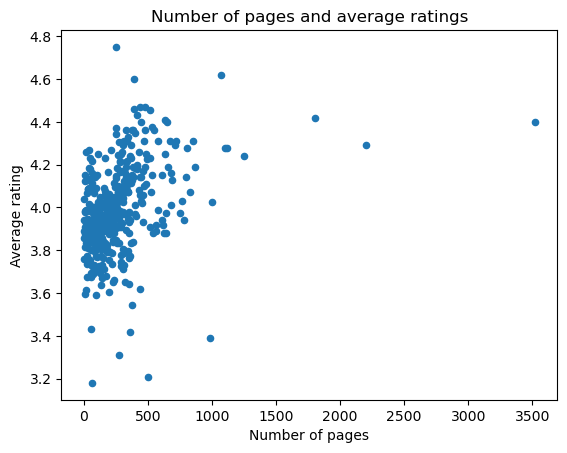

In [48]:
# Create a scatterplot to compare average ratings to page numbers
graph_1 = page_amount.plot.scatter(x='num_pages',
                      y='average_rating')
plt.title("Number of pages and average ratings")
plt.xlabel("Number of pages")
plt.ylabel("Average rating")

In [49]:
# Find the average ratings and compare that to the format type
average_rating = df_clean['average_rating'].mean()

# Create a new column to compare the rating with the average
df['above_average'] = df_clean['average_rating'] > average_rating

# Display the average rating and the updated DataFrame
print("Average Rating:", average_rating)
print(df[['format', 'above_average']].head())

Average Rating: 3.904518
      format  above_average
0  Paperback           True
1  Paperback           True
2  Paperback           True
3  Paperback          False
4  Paperback          False


In [50]:
popular_month_df = df_clean.groupby('publication_month')['average_rating'].mean()
popular_month_df

publication_month
1.0     3.863324
2.0     3.901096
3.0     3.869506
4.0     3.867383
5.0     3.875238
6.0     3.895054
7.0     3.873638
8.0     3.878858
9.0     3.866808
10.0    3.911184
11.0    3.954193
12.0    3.931183
Name: average_rating, dtype: float64

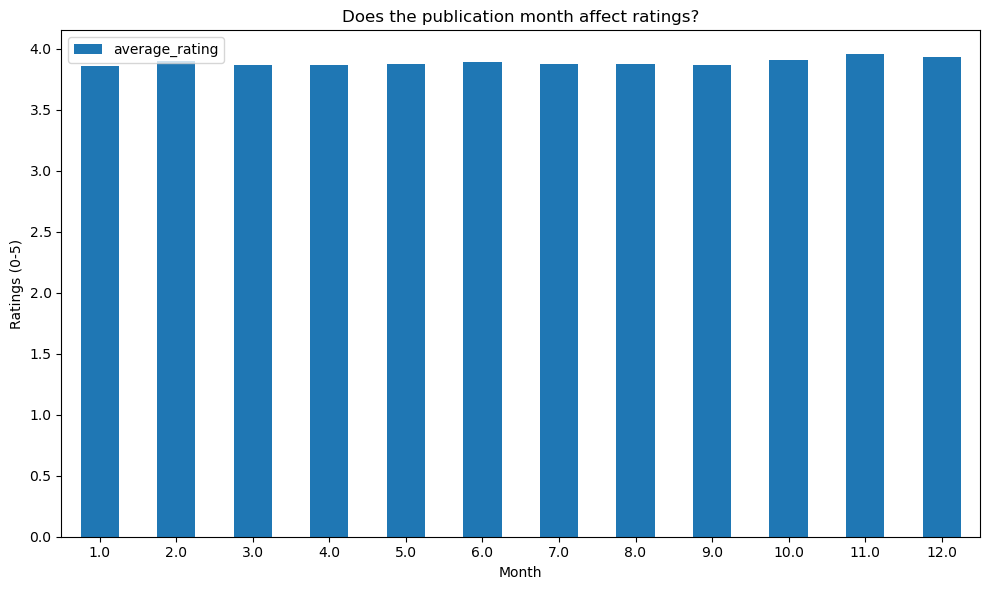

In [51]:
# Plot the average ratings by month
plt.figure(figsize=(10, 6))
popular_month_df.plot.bar(y='average_rating', rot=0)
plt.xlabel('Month')
plt.ylabel('Ratings (0-5)')
plt.title('Does the publication month affect ratings?')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
mongo.close()